<h1>DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

<h1>GRIP @ THE SPARK FOUNDATION

<h1>AUTHOR : KAPIL KISHOR CHANDGADKAR

<h1>Task 1 : Prediction using Supervised Machine Learning

<h1>Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.This is a simple linear regression task as it involves just two variables.

<h1>Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Loading The Dataset

In [2]:
#Reading data from remote link
url=r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
stud=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
#Returns the first x number of rows when head(x).Without a number it returns first 5 rows
stud.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h1>Exploratory Data Analysis

In [4]:
#Returns basic information of all columns
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Returns columns having null values or not 
stud.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#Returns basic statistics on numeric columns
stud.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Returns the pairwise correlation of all columns from the dataset
stud.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<h1>Visualization

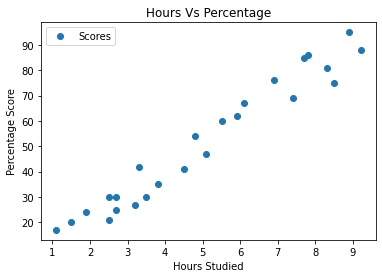

In [9]:
#Plotting the distribution of scores
stud.plot(x='Hours',y='Scores',style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph we can safely assume that a positive linear relation between the number of hours studied and percentage of score.

<h1>Preparing the data

In [13]:
x=stud.iloc[:,:-1].values
y=stud.iloc[:,1].values

<h1>Split the data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

<h1>Training the algorithm

In [15]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print("Training Complete")

Training Complete


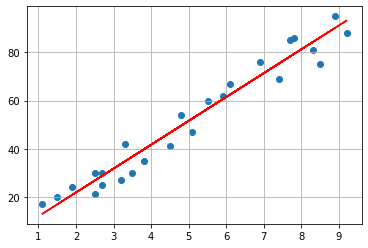

In [17]:
#Plotting the regression line
line=reg.coef_*x + reg.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.grid()
plt.show()

<h1>Making Predictions

In [18]:
print(x_test) #Testing data-In Hours
y_pred=reg.predict(x_test) #Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
#Comparing actual vs predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


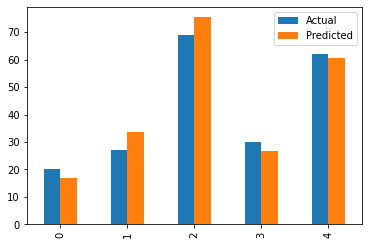

In [20]:
#Plot bar graph for predicted data
data_plot=df.head()
data_plot.plot(kind='bar')

<h1>Evaluating the model

In [22]:
print(f'The Train Score; {reg.score(x_train,y_train)}')
print(f'The Test Score; {reg.score(x_test,y_test)}')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'Mean Absolute Error :' ,mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error :' ,mean_squared_error(y_test,y_pred))

The Train Score; 0.9515510725211552
The Test Score; 0.9454906892105356
Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174


<h1>Evaluating what will be the predicted score if a student study for 9.25 hrs in a day?

In [24]:
#We can also test with our own data
hours=9.25
own_pred=reg.predict([[hours]])
print("Number Of Hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

Number Of Hours=9.25
Predicted Score=93.69173248737538
